#Introduction to Convolutional Neural Networks and Computer Vision and TensorFlow
Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the Data

The images we're working with are from the Food101 Dataset (101 different classes of food)

However we modified it to only use 2 classes.

> 🔑 **Note** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-01-14 08:30:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   201MB/s    in 0.5s    

2022-01-14 08:30:51 (201 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



##Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

#Walk through pizzasteak directory and list number of files.

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
#Extra file is .DS_STORE
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jan 14 08:30 .
drwxr-xr-x 1 root root 4096 Jan 14 08:30 ..
drwxr-xr-x 4 root root 4096 Jan 14 08:30 test
drwxr-xr-x 4 root root 4096 Jan 14 08:30 train


In [ ]:
#Another way to find images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
#Get class names programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[:]
print(class_names)

['pizza' 'steak']


In [ ]:
#Let's visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup the target directory (We'll view images from here)
  target_folder = target_dir+target_class

  #Get a random image
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read a image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

Image shape: (307, 512, 3)


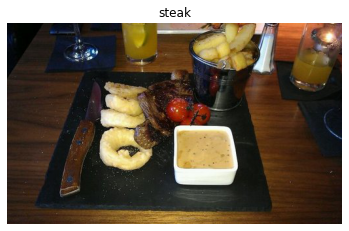

In [ ]:
#View random image from training data set
img = view_random_image(target_dir= "pizza_steak/train/",
                        target_class="steak")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(307, 512, 3), dtype=uint8, numpy=
array([[[  4,   7,  14],
        [  2,   5,  12],
        [  2,   5,  12],
        ...,
        [ 76,  35,  43],
        [ 68,  27,  31],
        [ 63,  23,  24]],

       [[  3,   6,  13],
        [  1,   4,  11],
        [  1,   4,  11],
        ...,
        [120,  77,  86],
        [117,  75,  79],
        [118,  76,  77]],

       [[  4,   7,  14],
        [  2,   5,  12],
        [  2,   5,  10],
        ...,
        [106,  63,  72],
        [107,  65,  69],
        [115,  73,  74]],

       ...,

       [[ 33,  15,  11],
        [ 37,  19,  15],
        [ 39,  20,  14],
        ...,
        [ 25,  18,  12],
        [ 21,  14,   8],
        [ 24,  19,  13]],

       [[ 39,  21,  17],
        [ 42,  24,  20],
        [ 45,  26,  20],
        ...,
        [ 25,  18,  12],
        [ 22,  15,   9],
        [ 24,  19,  13]],

       [[ 40,  22,  18],
        [ 44,  26,  22],
        [ 47,  28,  22],
        ...,
        [ 25,  18,  1

In [ ]:
img/255.

array([[[0.01568627, 0.02745098, 0.05490196],
        [0.00784314, 0.01960784, 0.04705882],
        [0.00784314, 0.01960784, 0.04705882],
        ...,
        [0.29803922, 0.1372549 , 0.16862745],
        [0.26666667, 0.10588235, 0.12156863],
        [0.24705882, 0.09019608, 0.09411765]],

       [[0.01176471, 0.02352941, 0.05098039],
        [0.00392157, 0.01568627, 0.04313725],
        [0.00392157, 0.01568627, 0.04313725],
        ...,
        [0.47058824, 0.30196078, 0.3372549 ],
        [0.45882353, 0.29411765, 0.30980392],
        [0.4627451 , 0.29803922, 0.30196078]],

       [[0.01568627, 0.02745098, 0.05490196],
        [0.00784314, 0.01960784, 0.04705882],
        [0.00784314, 0.01960784, 0.03921569],
        ...,
        [0.41568627, 0.24705882, 0.28235294],
        [0.41960784, 0.25490196, 0.27058824],
        [0.45098039, 0.28627451, 0.29019608]],

       ...,

       [[0.12941176, 0.05882353, 0.04313725],
        [0.14509804, 0.0745098 , 0.05882353],
        [0.15294118, 0

## An end-to-end example

Let's build a convultional neural network to finds patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our traing data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
tf.random.set_seed(42)

#Preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup path to data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#Build a CNN Model (same as the Tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation='relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"]),

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


(None,)

In [ ]:
#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 26s 209ms/step - loss: 0.5751 - accuracy: 0.7093 - val_loss: 0.4469 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4264 - accuracy: 0.7960 - val_loss: 0.3367 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4028 - accuracy: 0.8173 - val_loss: 0.3418 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3584 - accuracy: 0.8393 - val_loss: 0.3247 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3147 - accuracy: 0.8740 - val_loss: 0.3015 - val_accuracy: 0.8700


In [ ]:
#Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Readup on this website: https://poloclub.github.io/cnn-explainer/

## Using the same model as before
Let's use same the model we've built in a previous section to see if it works with our image data.
The model we're building is from TensorFlow playground!

In [ ]:
#Set seed
tf.random.set_seed(42)

#Create a model to eplicate the TF Playground model

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])

#Compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 1.2497 - accuracy: 0.5047 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Despite haveing 20X more parameters than CNN(MODEL_1) model_2 still performs badly....

In [ ]:
#Set seed
tf.random.set_seed(42)

#Create a model to eplicate the TF Playground model

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 3.6230 - accuracy: 0.6407 - val_loss: 0.4786 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.5890 - accuracy: 0.7193 - val_loss: 0.6505 - val_accuracy: 0.7000
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.8457 - accuracy: 0.7007 - val_loss: 0.6330 - val_accuracy: 0.7420
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.8015 - accuracy: 0.7120 - val_loss: 0.4534 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4786 - accuracy: 0.7893 - val_loss: 0.4660 - val_accuracy: 0.7640


## Binary Classification: Let's break it down
1. Become one with the data(VISUALIZE)
2. Preprocess data (Normalize and turn data into batches)
3. Create model
4. Fit the model
5. Evaluate the model
6. Ajust the different parameters and improve the model
7. Repeat until satisfied (Experiment)

1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (382, 512, 3)


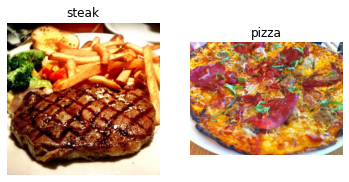

In [ ]:

#Visaluze the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

#### 2. Preprocess the data (prepare it for the model.)

In [ ]:
#Define the directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all ~10,000 images all at one time, a model might only look at 32 at a time.

It does this for a couple reasons...
1. 10,000 images may not fit into the memory of your GPU.
2. Trying to learn the patterns in 10,0000 images in one hit could result in the model not being able to learn very well.

Why 32?
Because 32 is good for your health. **DONT USE MORE THEN 32 otherwise model will usually turn out bad**



In [ ]:
#Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
#Load our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir, #Target Directory
                                               target_size=(224,224), #Target size of images (height,width)
                                               class_mode='binary', #Types of data we are working with
                                               batch_size=32) #Size of minibatches

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size=(224,224),
                                             class_mode= "binary",
                                             batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Get a sample of a train data batch
images, labels = train_data.next() #Get the "next batch of images/labels in train_data"
len(images), len(labels)


(32, 32)

In [ ]:
#how many batches are there
len(train_data)

47

In [ ]:
#Get first two images
images[:2], images[:]

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
#View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### Create a CNN Model (Start with a baseline)

In [ ]:
#Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
        Conv2D(filters=10,
               kernel_size=(3,3),
               strides=(1,1),
               padding='valid',
               activation='relu',
               input_shape= (224,224,3)),
        Conv2D(10,3,activation='relu'),
        Conv2D(10,3, activation ='relu'),
        Flatten(),
        Dense(1,activation="sigmoid")
])

In [ ]:
model_4.compile(loss = "binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
#Get summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 1.1465 - accuracy: 0.6680 - val_loss: 0.5562 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4890 - accuracy: 0.7740 - val_loss: 0.4041 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3620 - accuracy: 0.8507 - val_loss: 0.4037 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.1982 - accuracy: 0.9380 - val_loss: 0.4210 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.0708 - accuracy: 0.9847 - val_loss: 0.5141 - val_accuracy: 0.7960


## 5. Evaluating our model
It looks like our model is learning something, let's evaluate it.

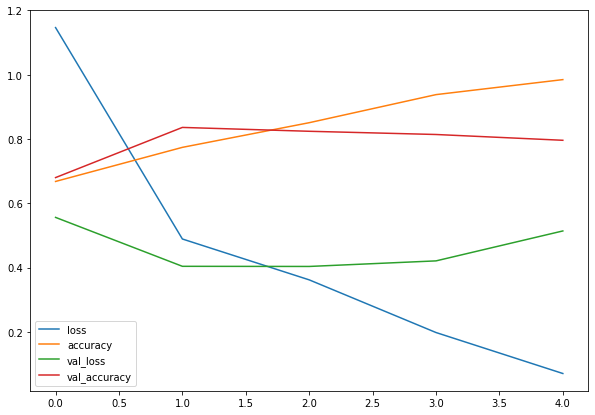

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
#Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #How many epochs in loss?


  #Plot Loss!!!
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  #Plot Accuracy!!!
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


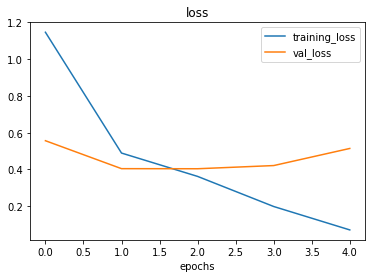

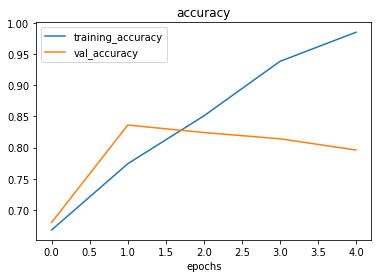

In [ ]:
#Plot figure
plot_loss_curves(history_4)

### 6. Adjust the model hyperparameters

Fitting a machine learning model comes in 3 steps

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase number of conv layers
* Increase number of Conv Filters
* Add another Dense layer to the output of our flattened layer

Reduce o verfitting:
* Add data augmentation
* Add regularization layers (such as MAXPOOL2D)
* Add More Data

**REDUCING Overfitting is called regularization

In [ ]:
#Create the model (This is going to be our new baseline)

model_5 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3, activation = "relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation ="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

In [ ]:
 #Compile the model

 model_5.compile(loss = "binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data= test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 190ms/step - loss: 0.6177 - accuracy: 0.6387 - val_loss: 0.6553 - val_accuracy: 0.6340
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4923 - accuracy: 0.7660 - val_loss: 0.4143 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4452 - accuracy: 0.7980 - val_loss: 0.3921 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4275 - accuracy: 0.8053 - val_loss: 0.4514 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4186 - accuracy: 0.8080 - val_loss: 0.3857 - val_accuracy: 0.8320


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

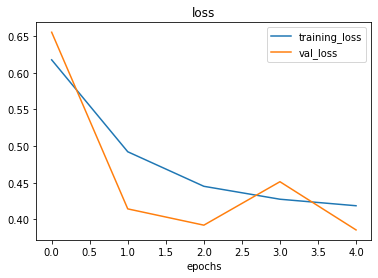

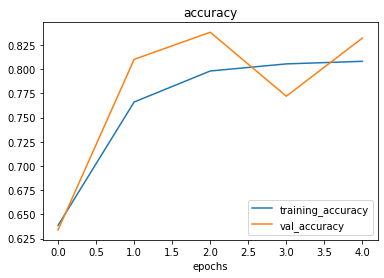

In [ ]:
#Plot it

plot_loss_curves(history_5)

In [ ]:
#OPening our bag of trips and finding data augmentation

In [ ]:
#Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale= 1/255.,
                                             rotation_range = .2,
                                             shear_range = .2,
                                             zoom_range = .2,
                                             width_shift_range = .2,
                                             height_shift_range=.2,
                                             horizontal_flip=True)

#Create image data generator without data augmentation

train_datagen = ImageDataGenerator(rescale=1/255.)

#Create test set without data augmentation for test dataset

test_datagen = ImageDataGenerator(rescale=1/255.)

*Question* what's data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable(hopefully) patterns. ALtering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write code to visualize data augmentation!

In [ ]:
#Import data and augment it from the training data
print("Augment Training Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=False) #Usually True)
                                                      
#Create non-augmented traing data batches
print("Non-Augmented Training Data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE= (224,224)
#Create non-augmented test data batches

print("Non-augmented test data:" )
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size = 32,
                                             class_mode = "binary")

Augment Training Data
Found 1500 images belonging to 2 classes.
Non-Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**NOTE** Data augmentation is usually only used on training data. Using IMAGEDATAGENERATOR built-in data augmentation parametes our images are left as they are in the directorues but are modified

Finally let's visualize some augmented data!!!


In [ ]:
#Get sample data batches

images, labels = train_data.next()

augmented_images, augmented_labels = train_data_augmented.next() #Loads Labels as well

showing image number: 5


(-0.5, 223.5, 223.5, -0.5)

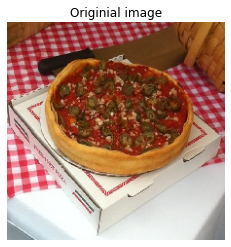

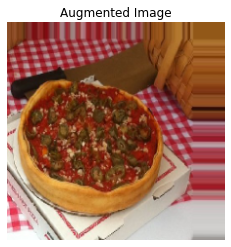

In [ ]:
import random
random_number = random.randint(0,32) #our batch size is 32...

print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Originial image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [ ]:
#Test Augmented Data

In [ ]:
#Create the model (This is going to be our new baseline)

model_6 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3, activation = "relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation ="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])
#Compile the model

model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

#Fit the model

history_6 = model_6.fit(train_data_augmented,
                         epochs=5,
                         steps_per_epoch=len(train_data_augmented),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 461ms/step - loss: 0.7118 - accuracy: 0.5480 - val_loss: 0.7858 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 21s 457ms/step - loss: 0.7087 - accuracy: 0.4560 - val_loss: 0.6817 - val_accuracy: 0.6800
Epoch 3/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6879 - accuracy: 0.5567 - val_loss: 0.6657 - val_accuracy: 0.5880
Epoch 4/5
47/47 [==============================] - 21s 458ms/step - loss: 0.6586 - accuracy: 0.6280 - val_loss: 0.5954 - val_accuracy: 0.6940
Epoch 5/5
47/47 [==============================] - 22s 458ms/step - loss: 0.6292 - accuracy: 0.6753 - val_loss: 0.5195 - val_accuracy: 0.7980


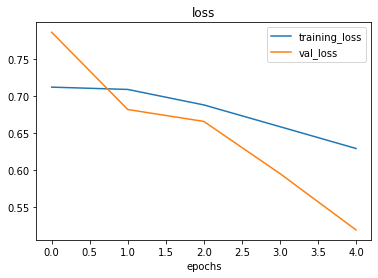

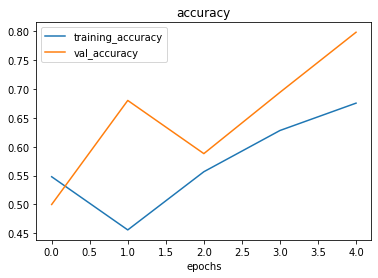

In [ ]:
plot_loss_curves(history_6)

In [ ]:
#Import data and augment it from the training data
print("Augment Training Data")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=True) #Usually True)
                                                      
#Create non-augmented traing data batches
print("Non-Augmented Training Data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE= (224,224)
#Create non-augmented test data batches

print("Non-augmented test data:" )
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size = 32,
                                             class_mode = "binary")

Augment Training Data
Found 1500 images belonging to 2 classes.
Non-Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
#Shuffle augmented training data and train another model (same as before) and see what happens.

model_7 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3, activation = "relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation ="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])
#Compile the model

model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

#Fit the model

history_7 = model_7.fit(train_data_augmented_shuffled,
                         epochs=5,
                         steps_per_epoch=len(train_data_augmented_shuffled),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 467ms/step - loss: 0.6662 - accuracy: 0.5867 - val_loss: 0.6052 - val_accuracy: 0.6880
Epoch 2/5
47/47 [==============================] - 22s 460ms/step - loss: 0.5813 - accuracy: 0.7073 - val_loss: 0.4895 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5403 - accuracy: 0.7207 - val_loss: 0.5422 - val_accuracy: 0.6960
Epoch 4/5
47/47 [==============================] - 21s 456ms/step - loss: 0.5065 - accuracy: 0.7520 - val_loss: 0.3380 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 22s 458ms/step - loss: 0.4740 - accuracy: 0.7827 - val_loss: 0.3633 - val_accuracy: 0.8500


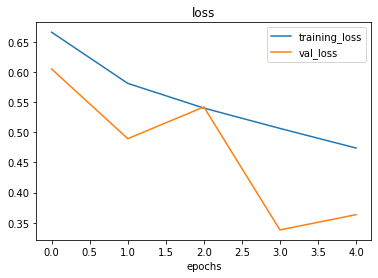

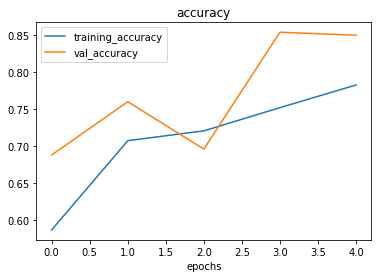

In [ ]:
plot_loss_curves(history_7)

7. Repeat until satisfied.

Since we've beaten our baseline, there are a few things we could try to continue to improve out model:

* Increase the number of model layers ( e.g. add more CONV2D/ MAXPOOL2D layers)

* Increase the numbers of filters in each convolutional layer (e.g. from 10 to 32 or even 64)

* Train for longer (more epochs)

* Find an ideal learning rate

* Get more data (give model more oppurtunities to learn.)

* Use transfer learning to leverage what another image model has learn and adjust it for our own use case.

**Practice** Recreate the model on the CNN explainer website (same as model_1) and see how it performs on the augmented training data.

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

(-0.5, 1499.5, 843.5, -0.5)

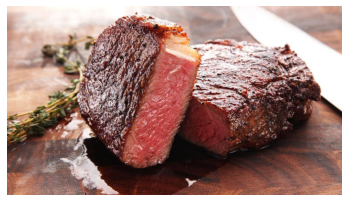

In [ ]:
steak = mpimg.imread('steak.jpg')
plt.imshow(steak)
plt.axis(False)

**NOTE ** When you train a neural network and you want to make a prediction with it on your own custom data you have to fit it to your NN.

In [ ]:
#Resize your custom image to fit the network.

def load_and_prep_image(filename, img_shape=224):
  """Read in image and turns it into a tensor to reshape it."""
  #Read in image
  img = tf.io.read_file(filename)
  #Decode readfile into a tensor
  img = tf.image.decode_image(img)
  #resize the image
  img = tf.image.resize(img,size = [img_shape, img_shape])
  #Rescale rthe image (Get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
#load in a and preprocess our custom image
steak = load_and_prep_image("steak.jpg")

In [ ]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.9592787 , 0.8730042 , 0.81810224],
        [0.96862745, 0.88235295, 0.827451  ],
        [0.96862745, 0.88235295, 0.83137256],
        ...,
        [0.7647059 , 0.61960787, 0.5568628 ],
        [0.76862746, 0.627451  , 0.57254905],
        [0.79726946, 0.656093  , 0.60119104]],

       [[0.95736766, 0.8671716 , 0.8122696 ],
        [0.9641107 , 0.8739146 , 0.81901264],
        [0.9647059 , 0.8784314 , 0.827451  ],
        ...,
        [0.76981795, 0.6156863 , 0.5484244 ],
        [0.7749303 , 0.62864184, 0.5653015 ],
        [0.79905516, 0.65276664, 0.58942634]],

       [[0.9641585 , 0.8621977 , 0.8112173 ],
        [0.972549  , 0.87058824, 0.81960785],
        [0.9664975 , 0.874749  , 0.8265056 ],
        ...,
        [0.77654654, 0.6079191 , 0.5334093 ],
        [0.7860998 , 0.6253155 , 0.5471711 ],
        [0.8243922 , 0.6636079 , 0.58571106]],

       ...,

       [[0.62543607, 0.3821554 , 0.29985026],
        [0.62

In [ ]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))
pred

array([[0.93795466]], dtype=float32)

In [ ]:
#Remind ourselves of class names
class_names

array(['steak'], dtype='<U5')

In [ ]:
#Index it!
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  #Import the target image and preprocess it
  img = load_and_prep_image(filename)
  #Make a prediciton
  pred = model.predict(tf.expand_dims(img,axis=0))
  #Get the prediction class
  pred_class = class_names[int(tf.round(pred))]

  #Plot the image and predicted class

  plt.imshow(img)
  plt.title(f"PREDICTION: {pred_class}")
  plt.axis(False);

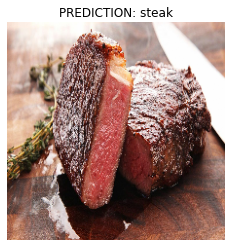

In [ ]:
#Test out model on custom data
pred_and_plot(model_7,"steak.jpg")

In [ ]:
#Transfer Learning is incredible, it outperforms everything i've done before by hand substantially.